In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [169]:
df=pd.read_csv("/content/Zoo.csv")

In [170]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [171]:
df.shape

(101, 18)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<Axes: >

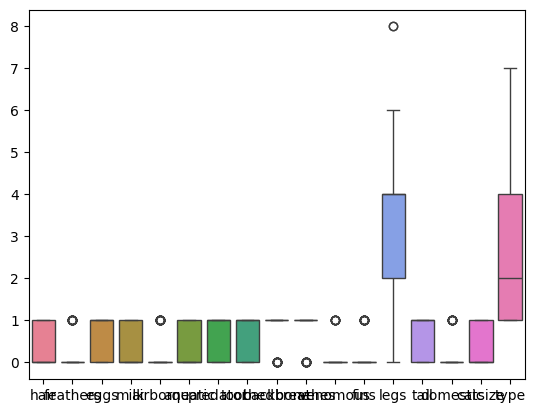

In [173]:
sns.boxplot(df)

In [174]:
df.isna().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [175]:
df.duplicated().sum()

np.int64(0)

In [176]:
df['animal name'].value_counts()

,count
animal name,
frog,2
aardvark,1
bass,1
antelope,1
bear,1
...,...
wallaby,1
wasp,1
wolf,1


In [177]:
df['type'].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [178]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['animal name']=le.fit_transform(df['animal name'])

In [179]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [180]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [181]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [182]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,0:-1]
y=df.iloc[:,17]

In [183]:
x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [184]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [185]:
type(x)

pandas.core.frame.DataFrame

In [186]:
x=sc.fit_transform(x)

In [187]:
x

array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [188]:
x=pd.DataFrame(x)

In [189]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [190]:
num_folds = 5
kfold = KFold(n_splits=num_folds)

In [191]:
knn=KNeighborsClassifier(n_neighbors=2)
results=cross_val_score(knn,x,y,cv=kfold)

In [192]:
results

array([1.  , 0.95, 0.95, 0.9 , 0.8 ])

In [193]:
results.mean()

np.float64(0.9199999999999999)

In [194]:
from sklearn.model_selection import GridSearchCV

In [201]:
n_neighbors = np.array(list(range(1,40,2))) #only odd number of clusters (1 3 5 7 ... 39) will be considered
param_grid = dict(n_neighbors=n_neighbors)

In [202]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [203]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [204]:
model_KNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=model_KNN,param_grid=param_grid)
grid.fit(x,y)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [205]:
grid.best_score_

np.float64(0.9800000000000001)

In [206]:
print(grid.best_params_)

{'n_neighbors': np.int64(1)}


In [207]:
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=kfold, scoring='accuracy')
    k_scores.append(scores.mean())
pd.Series(k_scores).sort_values(ascending=False)

,0
0,0.930000
1,0.920000
3,0.900000
2,0.890000
4,0.890000
5,0.880000
7,0.850952
6,0.840952
9,0.830476
10,0.830476


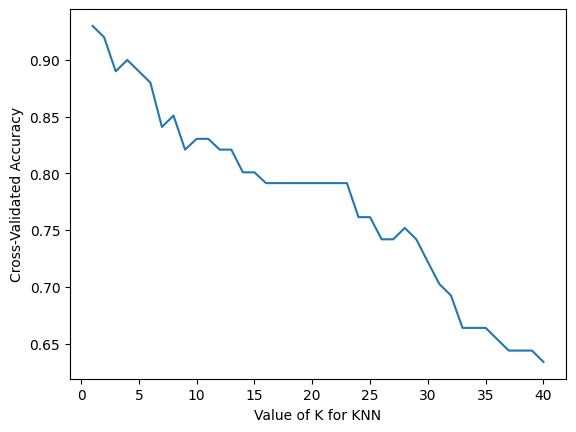

In [209]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# **1. What are the key hyperparameters in KNN?**

# **1) n_neighbors (K value)**

The number of nearest neighbors to consider when making a prediction.

It’s the most critical parameter in KNN.

Effect:

Small k → more sensitive to noise (can overfit).

Large k → smoother decision boundary (can underfit).

Example:
If k=3, the algorithm looks at the 3 closest data points to decide the class.

# **2) leaf_size**

Used in 'ball_tree' or 'kd_tree' algorithms.
It controls the speed vs. memory tradeoff during neighbor search.

# **2. What distance metrics can be used in KNN?**

# **1) Euclidean Distance (Default)**

It’s the most common distance metric for continuous numerical data.
It measures the straight-line distance between two points in multidimensional space.

# **2) Cosine Distance (1 - Cosine Similarity)**

Measures the angle between two vectors rather than their magnitude.
Often used in text, NLP, or high-dimensional sparse data.

KNN can use multiple distance metrics like Euclidean, Manhattan, Minkowski, Chebyshev, Cosine, and Hamming, depending on the type of data and nature of features.